In [1]:
#Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# Load dataset
data_name = 'INF2178_A1_data.xlsx'
df = pd.read_excel(data_name)


In [2]:
# Filter the columns that we need
filter_columns = ['CAPACITY_TYPE', 'PROGRAM_MODEL', 'SERVICE_USER_COUNT',
                    'CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS', 'CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS']
df_filter = df[filter_columns]
df_filter

,CAPACITY_TYPE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,Room Based Capacity,Emergency,74,NaN,NaN,29.0,26.0
1,Room Based Capacity,Emergency,3,NaN,NaN,3.0,3.0
2,Room Based Capacity,Emergency,24,NaN,NaN,28.0,23.0
3,Room Based Capacity,Emergency,25,NaN,NaN,17.0,17.0
4,Room Based Capacity,Emergency,13,NaN,NaN,14.0,13.0
...,...,...,...,...,...,...,...
50939,Bed Based Capacity,Emergency,6,20.0,6.0,NaN,NaN
50940,Bed Based Capacity,Emergency,23,23.0,23.0,NaN,NaN
50941,Bed Based Capacity,Transitional,13,14.0,13.0,NaN,NaN
50942,Bed Based Capacity,Emergency,10,10.0,10.0,NaN,NaN


# Data Cleaning

In [3]:
#Data cleaning process
#Checking the total amount of missing value
print(df_filter.isnull().sum())
#Setting capacity bed and occupied bed to 0 for room based
#Setting capacity room and occupied room to 0 for bed based
df_filter.loc[df_filter['CAPACITY_TYPE'].isin(['Room Based Capacity']), ['CAPACITY_ACTUAL_BED', 'OCCUPIED_BEDS']] = 0
df_filter.loc[df_filter['CAPACITY_TYPE'].isin(['Bed Based Capacity']), ['CAPACITY_ACTUAL_ROOM', 'OCCUPIED_ROOMS']] = 0 
#Replacing na value in PROGRAM_MODEL by mode
df_filter['PROGRAM_MODEL'].fillna(df['PROGRAM_MODEL'].mode()[0], inplace=True)


CAPACITY_TYPE               0
PROGRAM_MODEL               2
SERVICE_USER_COUNT          0
CAPACITY_ACTUAL_BED     18545
OCCUPIED_BEDS           18545
CAPACITY_ACTUAL_ROOM    32399
OCCUPIED_ROOMS          32399
dtype: int64


In [4]:
#Make sure there is no miss value in selected columns.
print(df_filter.isnull().sum())
df_filter

CAPACITY_TYPE           0
PROGRAM_MODEL           0
SERVICE_USER_COUNT      0
CAPACITY_ACTUAL_BED     0
OCCUPIED_BEDS           0
CAPACITY_ACTUAL_ROOM    0
OCCUPIED_ROOMS          0
dtype: int64


,CAPACITY_TYPE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,Room Based Capacity,Emergency,74,0.0,0.0,29.0,26.0
1,Room Based Capacity,Emergency,3,0.0,0.0,3.0,3.0
2,Room Based Capacity,Emergency,24,0.0,0.0,28.0,23.0
3,Room Based Capacity,Emergency,25,0.0,0.0,17.0,17.0
4,Room Based Capacity,Emergency,13,0.0,0.0,14.0,13.0
...,...,...,...,...,...,...,...
50939,Bed Based Capacity,Emergency,6,20.0,6.0,0.0,0.0
50940,Bed Based Capacity,Emergency,23,23.0,23.0,0.0,0.0
50941,Bed Based Capacity,Transitional,13,14.0,13.0,0.0,0.0
50942,Bed Based Capacity,Emergency,10,10.0,10.0,0.0,0.0


# EDA

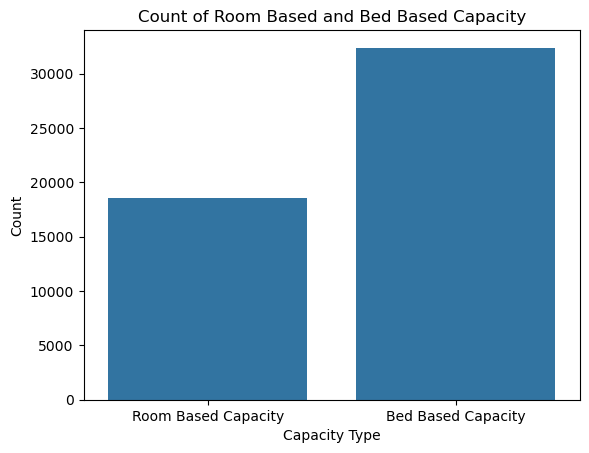

In [5]:
#Showing the count of different types of capacity.
sns.countplot(x='CAPACITY_TYPE', data=df_filter)
plt.title('Count of Room Based and Bed Based Capacity')
plt.xlabel('Capacity Type')
plt.ylabel('Count')
plt.show()

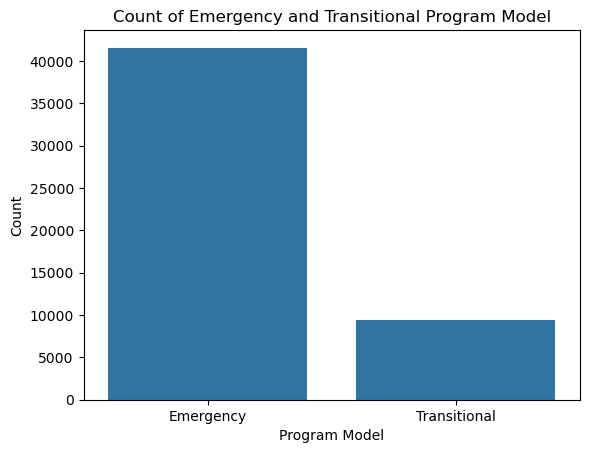

In [6]:
#Showing the count of different models of program.
sns.countplot(x='PROGRAM_MODEL', data=df_filter)
plt.title('Count of Emergency and Transitional Program Model')
plt.xlabel('Program Model')
plt.ylabel('Count')
plt.show()

In [7]:
# Filter rows where 'CAPACITY_TYPE' is 'Bed Based Capacity'
df_bed_based = df_filter[df_filter['CAPACITY_TYPE'] == 'Bed Based Capacity']
# Calculate the occupied bed rate
df_bed_based['OCCUPIED_BED_RATE'] = df_bed_based['OCCUPIED_BEDS'] / df_bed_based['CAPACITY_ACTUAL_BED']
df_bed_based 

,CAPACITY_TYPE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPIED_BED_RATE
5,Bed Based Capacity,Emergency,6,8.0,6.0,0.0,0.0,0.750000
10,Bed Based Capacity,Emergency,22,24.0,22.0,0.0,0.0,0.916667
11,Bed Based Capacity,Emergency,8,12.0,8.0,0.0,0.0,0.666667
21,Bed Based Capacity,Transitional,10,12.0,10.0,0.0,0.0,0.833333
25,Bed Based Capacity,Emergency,11,12.0,11.0,0.0,0.0,0.916667
...,...,...,...,...,...,...,...,...
50939,Bed Based Capacity,Emergency,6,20.0,6.0,0.0,0.0,0.300000
50940,Bed Based Capacity,Emergency,23,23.0,23.0,0.0,0.0,1.000000
50941,Bed Based Capacity,Transitional,13,14.0,13.0,0.0,0.0,0.928571
50942,Bed Based Capacity,Emergency,10,10.0,10.0,0.0,0.0,1.000000


In [8]:

# Define function for getting summary statistics
def get_summary_statistics(dataset):

    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    min_value = np.round(dataset.min(), 2)
    max_value = np.round(dataset.max(), 2)
    quartile_1 = np.round(dataset.quantile(0.25), 2)
    quartile_3 = np.round(dataset.quantile(0.75), 2)

    # Interquartile range
    iqr = np.round(quartile_3 - quartile_1, 2)

    print('Min: %s' % min_value)
    print('Mean: %s' % mean)
    print('Max: %s' % max_value)
    print('25th percentile: %s' % quartile_1)
    print('Median: %s' % median)
    print('75th percentile: %s' % quartile_3)
    print('Interquartile range (IQR): %s' % iqr)
    
# Summary statistics for occupied bed rate
print('\n\nbed based capacity summary statistics')
get_summary_statistics(df_bed_based['OCCUPIED_BED_RATE'])



bed based capacity summary statistics
Min: 0.02
Mean: 0.93
Max: 1.0
25th percentile: 0.9
Median: 1.0
75th percentile: 1.0
Interquartile range (IQR): 0.1


In [9]:
# Filter rows where 'CAPACITY_TYPE' is 'Room Based Capacity'
df_room_based = df_filter[df_filter['CAPACITY_TYPE'] == 'Room Based Capacity']
# Calculate the occupied room rate
df_room_based['OCCUPIED_ROOM_RATE'] = df_room_based['OCCUPIED_ROOMS'] / df_room_based['CAPACITY_ACTUAL_ROOM']
df_room_based

,CAPACITY_TYPE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPIED_ROOM_RATE
0,Room Based Capacity,Emergency,74,0.0,0.0,29.0,26.0,0.896552
1,Room Based Capacity,Emergency,3,0.0,0.0,3.0,3.0,1.000000
2,Room Based Capacity,Emergency,24,0.0,0.0,28.0,23.0,0.821429
3,Room Based Capacity,Emergency,25,0.0,0.0,17.0,17.0,1.000000
4,Room Based Capacity,Emergency,13,0.0,0.0,14.0,13.0,0.928571
...,...,...,...,...,...,...,...,...
50920,Room Based Capacity,Emergency,128,0.0,0.0,128.0,128.0,1.000000
50923,Room Based Capacity,Emergency,76,0.0,0.0,76.0,76.0,1.000000
50927,Room Based Capacity,Emergency,10,0.0,0.0,3.0,3.0,1.000000
50932,Room Based Capacity,Emergency,74,0.0,0.0,23.0,22.0,0.956522


In [10]:
    
# Summary statistics for occupied room rate
print('\n\nroom based capacity summary statistics')
get_summary_statistics(df_room_based['OCCUPIED_ROOM_RATE'])



room based capacity summary statistics
Min: 0.01
Mean: 0.93
Max: 1.01
25th percentile: 0.96
Median: 1.0
75th percentile: 1.0
Interquartile range (IQR): 0.04


In [11]:
df_filter['OCCUPIED_ROOM_RATE'] = df_filter['OCCUPIED_ROOMS'] / df_filter['CAPACITY_ACTUAL_ROOM']
df_filter['OCCUPIED_BED_RATE'] = df_filter['OCCUPIED_BEDS'] / df_filter['CAPACITY_ACTUAL_BED']
# Create OCCUPIED_RATE column that room capacity type with occupied room rate and bed capacity type 
# with occupied bed rate
df_filter['OCCUPIED_RATE'] = np.where(
    df_filter['CAPACITY_TYPE'] == 'Room Based Capacity',
    df_filter['OCCUPIED_ROOM_RATE'],
    df_filter['OCCUPIED_BED_RATE']
)
#Drop OCCUPIED_ROOM_RATE and OCCUPIED_BED_RATE column
df_filter.drop(['OCCUPIED_ROOM_RATE','OCCUPIED_BED_RATE'], axis = 1 ,inplace = True)
# Now the dataset contains the OCCUPIED_RATE column for both room based and bed based capicity type
df_filter

,CAPACITY_TYPE,PROGRAM_MODEL,SERVICE_USER_COUNT,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPIED_RATE
0,Room Based Capacity,Emergency,74,0.0,0.0,29.0,26.0,0.896552
1,Room Based Capacity,Emergency,3,0.0,0.0,3.0,3.0,1.000000
2,Room Based Capacity,Emergency,24,0.0,0.0,28.0,23.0,0.821429
3,Room Based Capacity,Emergency,25,0.0,0.0,17.0,17.0,1.000000
4,Room Based Capacity,Emergency,13,0.0,0.0,14.0,13.0,0.928571
...,...,...,...,...,...,...,...,...
50939,Bed Based Capacity,Emergency,6,20.0,6.0,0.0,0.0,0.300000
50940,Bed Based Capacity,Emergency,23,23.0,23.0,0.0,0.0,1.000000
50941,Bed Based Capacity,Transitional,13,14.0,13.0,0.0,0.0,0.928571
50942,Bed Based Capacity,Emergency,10,10.0,10.0,0.0,0.0,1.000000


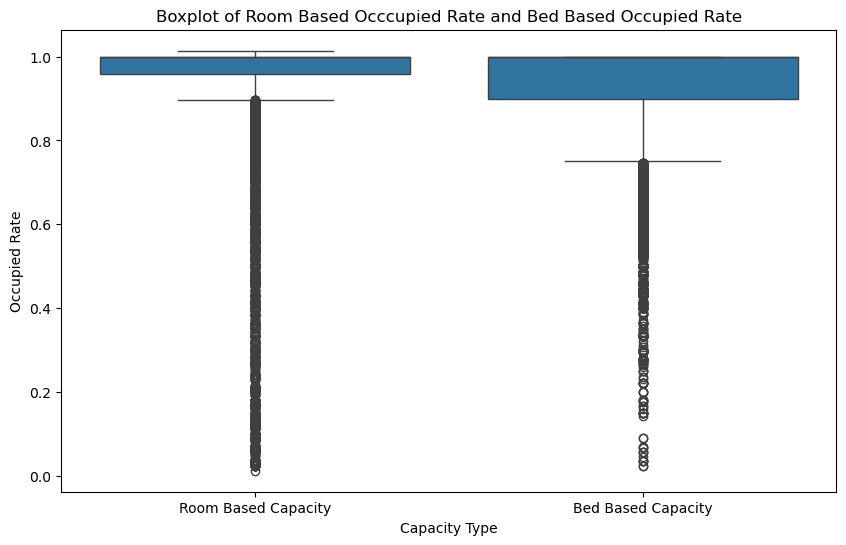

In [12]:
# Showing boxplot of room capacity type occupied rate and bed capacity type occupied rate
plt.figure(figsize=(10, 6))
sns.boxplot(x='CAPACITY_TYPE', y='OCCUPIED_RATE', data=df_filter)
plt.title('Boxplot of Room Based Occcupied Rate and Bed Based Occupied Rate')
plt.xlabel('Capacity Type')
plt.ylabel('Occupied Rate')
plt.show()

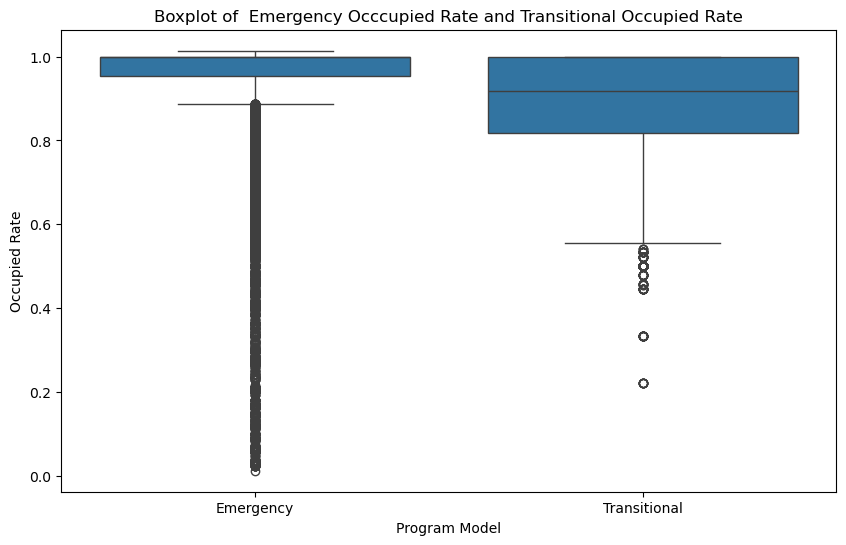

In [13]:
#Show boxplot of occupied rate in emergency and transitional program model
plt.figure(figsize=(10, 6))
sns.boxplot(x='PROGRAM_MODEL', y='OCCUPIED_RATE', data=df_filter)
plt.title('Boxplot of  Emergency Occcupied Rate and Transitional Occupied Rate')
plt.xlabel('Program Model')
plt.ylabel('Occupied Rate')
plt.show()

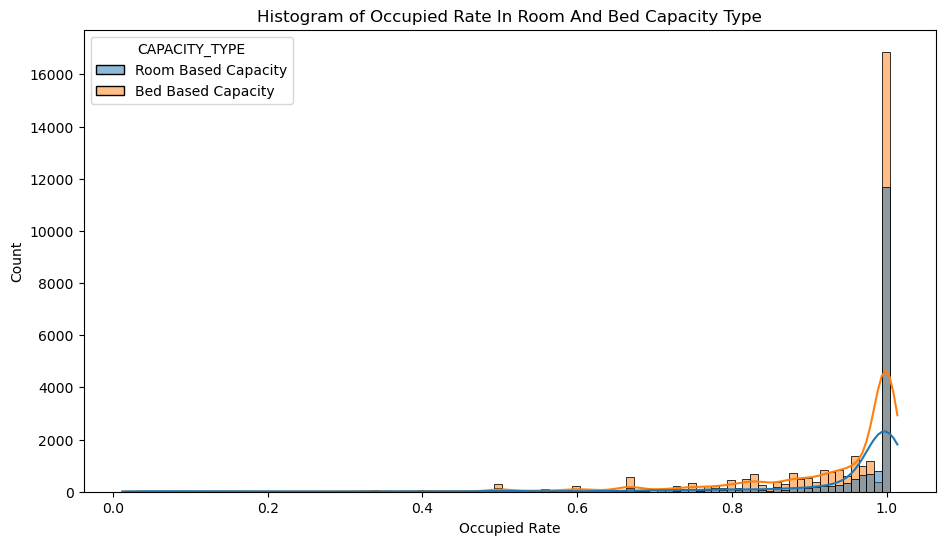

In [14]:
# Distribution of OCCUPIED_RATE for bed and room capacity type
plt.figure(figsize=(11, 6))
sns.histplot(df_filter, x='OCCUPIED_RATE', hue='CAPACITY_TYPE', kde = True, binwidth = 0.01)
plt.title('Histogram of Occupied Rate In Room And Bed Capacity Type')
plt.xlabel('Occupied Rate')
plt.ylabel('Count')
plt.show()

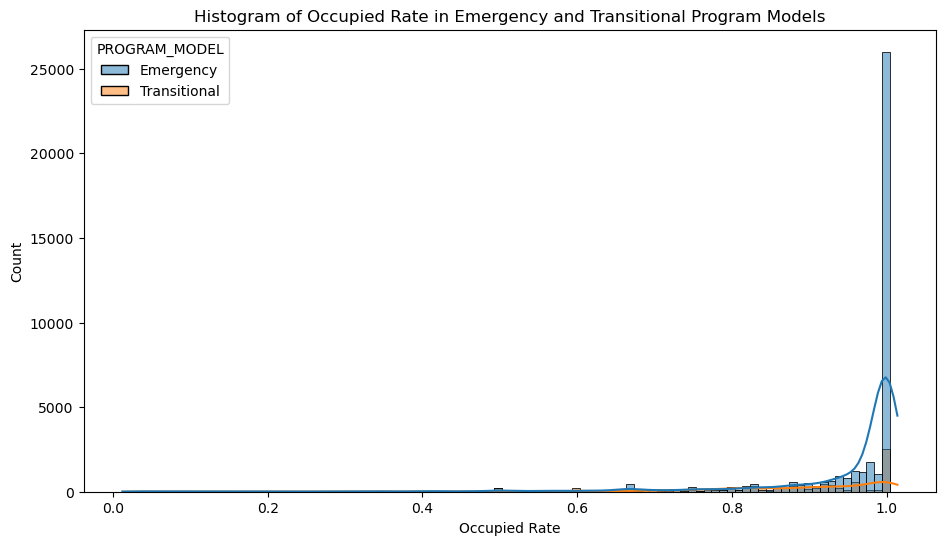

In [15]:
# Distribution of OCCUPIED_RATE for emergency and transitional program model
plt.figure(figsize=(11, 6))
sns.histplot(df_filter, x='OCCUPIED_RATE', hue='PROGRAM_MODEL',kde = True, binwidth = 0.01)
plt.title('Histogram of Occupied Rate in Emergency and Transitional Program Models')
plt.xlabel('Occupied Rate')
plt.ylabel('Count')
plt.show()

# T-test

In [16]:
#Perform two- sample t-test compare the occupied rate difference in different capacity type
room_rate = df_filter[df_filter['CAPACITY_TYPE'] == 'Room Based Capacity']['OCCUPIED_RATE']
bed_rate = df_filter[df_filter['CAPACITY_TYPE'] == 'Bed Based Capacity']['OCCUPIED_RATE']

t_stat, p_val = stats.ttest_ind(room_rate, bed_rate)
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))


t-statistic = 4.854104599422829
p-value = 1.2128933183471424e-06


In [17]:
# Perform welch's t-test compare the occupied rate difference in different capacity type
room_rate = df_filter[df_filter['CAPACITY_TYPE'] == 'Room Based Capacity']['OCCUPIED_RATE']
bed_rate = df_filter[df_filter['CAPACITY_TYPE'] == 'Bed Based Capacity']['OCCUPIED_RATE']

t_stat, p_val = stats.ttest_ind(room_rate, bed_rate, equal_var=False)
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))


t-statistic = 4.498751771925636
p-value = 6.860477551487939e-06


In [18]:
#Perform two- sample t-test compare the occupied rate difference in different program model
emergency_rate = df_filter[df_filter['PROGRAM_MODEL'] == 'Emergency']['OCCUPIED_RATE']
transitional_rate = df_filter[df_filter['PROGRAM_MODEL'] == 'Transitional']['OCCUPIED_RATE']

t_stat, p_val = stats.ttest_ind(emergency_rate, transitional_rate)
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))


t-statistic = 39.06876276218507
p-value = 0.0


In [19]:
#Perform welch's t-test compare the occupied rate difference in different program model
emergency_rate = df_filter[df_filter['PROGRAM_MODEL'] == 'Emergency']['OCCUPIED_RATE']
transitional_rate = df_filter[df_filter['PROGRAM_MODEL'] == 'Transitional']['OCCUPIED_RATE']

t_stat, p_val = stats.ttest_ind(emergency_rate, transitional_rate, equal_var=False)
print("t-statistic = " + str(t_stat))
print("p-value = " + str(p_val))

t-statistic = 40.97518639553636
p-value = 0.0
